In [1]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import numpy as np
from  psycopg2 import connect

**Load .csv file**

In [2]:
csv_file = "movie_metadata1.csv"
movie_df = pd.read_csv(csv_file)
movie_df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000


**Clean dataframe**

In [3]:
new_movie_df = movie_df[['title','imdb_score','gross','budget','title_year']].copy()
new_movie_df.head()

,title,imdb_score,gross,budget,title_year
0,Avatar,7.9,760505847,237000000.0,2009.0
1,Pirates of the Caribbean: At World's End,7.1,309404152,300000000.0,2007.0
2,Spectre,6.8,200074175,245000000.0,2015.0
3,The Dark Knight Rises,8.5,448130642,250000000.0,2012.0
4,John Carter,6.6,73058679,263700000.0,2012.0


In [4]:
new_movie_df['net_revenue']=new_movie_df['gross']-new_movie_df['budget']
new_movie_df.head()

,title,imdb_score,gross,budget,title_year,net_revenue
0,Avatar,7.9,760505847,237000000.0,2009.0,523505847.0
1,Pirates of the Caribbean: At World's End,7.1,309404152,300000000.0,2007.0,9404152.0
2,Spectre,6.8,200074175,245000000.0,2015.0,-44925825.0
3,The Dark Knight Rises,8.5,448130642,250000000.0,2012.0,198130642.0
4,John Carter,6.6,73058679,263700000.0,2012.0,-190641321.0


**Load .csv file**

In [5]:
csv_file = "tmdb_5000_movies.csv"
tmdb_df = pd.read_csv(csv_file)
#tmdb_df.head()

**Clean dataframe**

In [6]:
new_tmdb_df = tmdb_df[['title','vote_average','revenue','budget','release_date']].copy()
new_tmdb_df.head()

,title,vote_average,revenue,budget,release_date
0,Avatar,7.2,2787965087,237000000,2009.0
1,Pirates of the Caribbean: At World's End,6.9,961000000,300000000,2007.0
2,Spectre,6.3,880674609,245000000,2015.0
3,The Dark Knight Rises,7.6,1084939099,250000000,2012.0
4,John Carter,6.1,284139100,260000000,2012.0


In [7]:
new_tmdb_df['net_revenue']=new_tmdb_df['revenue']-new_tmdb_df['budget']
new_tmdb_df.head()

,title,vote_average,revenue,budget,release_date,net_revenue
0,Avatar,7.2,2787965087,237000000,2009.0,2550965087
1,Pirates of the Caribbean: At World's End,6.9,961000000,300000000,2007.0,661000000
2,Spectre,6.3,880674609,245000000,2015.0,635674609
3,The Dark Knight Rises,7.6,1084939099,250000000,2012.0,834939099
4,John Carter,6.1,284139100,260000000,2012.0,24139100


**Connect to local database**

In [8]:
rds_connection_string = "postgres:postgres@localhost:5432/movies"
engine = create_engine(f'postgresql://{rds_connection_string}')

In [9]:
engine.table_names()

['movie', 'tmdb']

In [17]:
#new_movie_df.to_sql(name='movie',con=engine,if_exists='append',index=False)

In [18]:
#new_tmdb_df.to_sql(name='tmdb',con=engine,if_exists='append',index=False)

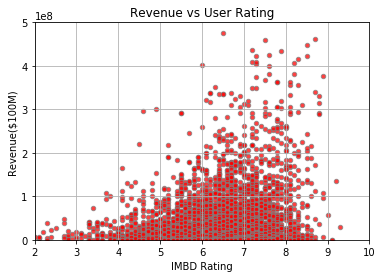

In [19]:
#scatter plot
new_movie_df.plot(kind="scatter", x='imdb_score', y='gross',alpha=0.75, color='red', edgecolor='gray')
plt.grid()
s=('budget')
plt.xlim(2,10,1)
plt.ylim(-.5,500000000)
plt.title('Revenue vs User Rating')
plt.xlabel('IMBD Rating')
plt.ylabel("Revenue($100M)")
plt.savefig("IMDB_scatter.jpg")
plt.show()

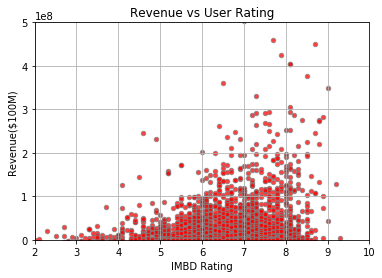

In [20]:
#scatter plot
new_movie_df.plot(kind="scatter", x='imdb_score', y='net_revenue',alpha=0.75, color='red', edgecolor='gray')
plt.grid()
s=('budget')
plt.xlim(2,10,1)
plt.ylim(-.5,500000000)
plt.title('Revenue vs User Rating')
plt.xlabel('IMBD Rating')
plt.ylabel("Revenue($100M)")
plt.savefig("IMDB_netrev_scatter.jpg")
plt.show()

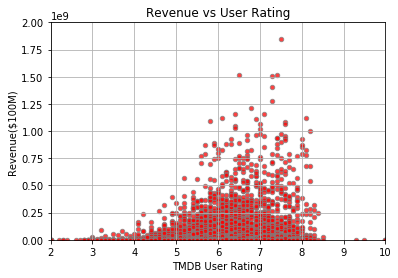

In [21]:
#scatter plot
new_tmdb_df.plot(kind="scatter", x='vote_average', y='revenue',alpha=0.75, color='red', edgecolor='gray')
plt.grid()
s=('budget')
plt.xlim(2,10,1)
plt.ylim(-.5,2000000000)
plt.title('Revenue vs User Rating')
plt.xlabel('TMDB User Rating')
plt.ylabel("Revenue($100M)")
plt.savefig("TMDB_scatter.jpg")
plt.show()

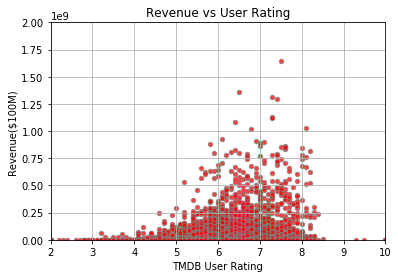

In [22]:
#scatter plot
new_tmdb_df.plot(kind="scatter", x='vote_average', y='net_revenue',alpha=0.75, color='red', edgecolor='gray')
plt.grid()
s=('budget')
plt.xlim(2,10,1)
plt.ylim(-.5,2000000000)
plt.title('Revenue vs User Rating')
plt.xlabel('TMDB User Rating')
plt.ylabel("Revenue($100M)")
plt.savefig("TMDB_netrev_scatter.jpg")
plt.show()